# HOUSE PRICE PREDICTION USING MACHINE LEARNING

### Importing Libraries and dataset

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [15]:
df=pd.read_csv("C:\\Users\\Garima Ranjan\\Downloads\\Delhi.csv")

### Data cleaning

In [16]:
#Since 0 and 1 tells us that the house comes with amenities or not and 9 in the data means not mentioned. So we will convert all 9 to nan and then drop all the missing values
df.replace(9, np.nan, inplace=True)
df.dropna(inplace = True)
df.isna().sum()

Price                  0
Area                   0
Location               0
No. of Bedrooms        0
Resale                 0
MaintenanceStaff       0
Gymnasium              0
SwimmingPool           0
LandscapedGardens      0
JoggingTrack           0
RainWaterHarvesting    0
IndoorGames            0
ShoppingMall           0
Intercom               0
SportsFacility         0
ATM                    0
ClubHouse              0
School                 0
24X7Security           0
PowerBackup            0
CarParking             0
StaffQuarter           0
Cafeteria              0
MultipurposeRoom       0
Hospital               0
WashingMachine         0
Gasconnection          0
AC                     0
Wifi                   0
Children'splayarea     0
LiftAvailable          0
BED                    0
VaastuCompliant        0
Microwave              0
GolfCourse             0
TV                     0
DiningTable            0
Sofa                   0
Wardrobe               0
Refrigerator           0


In [17]:
df.shape

(2002, 40)

### Data Processing

In [18]:
#finding number of objects,integers and floats 
obj=(df.dtypes=='object')
object_cols=list(obj[obj].index)
print("Categorial variables:", len(object_cols))

int_=(df.dtypes=='int64')
int_cols=list(int_[int_].index)
print("Integer variables:",len(int_cols))

fl_=(df.dtypes=='float64')
fl_cols=list(fl_[fl_].index)
print("Float variables:",len(fl_cols))

Categorial variables: 1
Integer variables: 4
Float variables: 35


In [19]:
df.describe()

,Price,Area,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,RainWaterHarvesting,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
count,2.002000e+03,2002.000000,2002.000000,2002.000000,2002.000000,2002.000000,2002.000000,2002.000000,2002.000000,2002.000000,...,2002.000000,2002.000000,2002.000000,2002.000000,2002.0,2002.000000,2002.000000,2002.000000,2002.0,2002.000000
mean,1.029472e+07,1200.141359,2.688811,0.700799,0.071928,0.193806,0.052448,0.101399,0.044456,0.107393,...,0.650849,0.053447,0.154346,0.045455,0.0,0.051449,0.034466,0.044955,0.0,0.041459
std,9.119848e+06,614.340764,0.729588,0.458022,0.258433,0.395378,0.222984,0.301931,0.206156,0.309689,...,0.476821,0.224978,0.361370,0.208351,0.0,0.220966,0.182467,0.207257,0.0,0.199398
min,2.000000e+06,200.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000
25%,3.600000e+06,720.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000
50%,7.000000e+06,1000.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000
75%,1.550000e+07,1700.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000
max,1.625000e+08,6400.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,0.0,1.000000


### Encoding Categorical data

In [20]:
from sklearn.preprocessing import OneHotEncoder
 
s = (df.dtypes == 'object')
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)
print('No. of. categorical features: ',
      len(object_cols))

Categorical variables:
['Location']
No. of. categorical features:  1


In [21]:
OH_encoder = OneHotEncoder(sparse=False)
OH_cols = pd.DataFrame(OH_encoder.fit_transform(df[object_cols]))
OH_cols.index = df.index
OH_cols.columns = OH_encoder.get_feature_names_out()
df_final = df.drop(object_cols, axis=1)
df_final = pd.concat([df_final, OH_cols], axis=1)

In [22]:
df_final

,Price,Area,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,RainWaterHarvesting,...,Location_Sidhartha Nagar,Location_Siri Fort,Location_South Extension 2,Location_Uttam Nagar,Location_Vasant Kunj,Location_West End,Location_West Sagarpur,Location_greater kailash Enclave 1,Location_mayur vihar phase 1,Location_nawada
0,10500000,1200,2,1,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,6000000,1000,3,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,15000000,1350,2,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2500000,435,2,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5800000,900,3,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1997,9000000,1200,2,1,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1998,12000000,1350,3,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1999,16000000,1963,4,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2000,11600000,1050,2,1,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Splitting Dataset into training and testing

In [23]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
 
X = np.array(df_final.drop(['Price'], axis=1))
Y = np.array(df_final['Price'])
Y = Y.reshape(len(Y),1) 
# Split the training set into
# training and validation set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=0)

### Using Support Vector Regression(SVR) Model

In [24]:
from sklearn.metrics import mean_absolute_percentage_error

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train = sc_X.fit_transform(X_train)
Y_train = sc_y.fit_transform(Y_train)

In [25]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, Y_train)

C:\Users\Garima Ranjan\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [26]:
#predicting the test set results
Y_pred= regressor.predict(X_test)
print(mean_absolute_percentage_error(Y_test, Y_pred))

0.9999999540899248


In [27]:
Y_pred = sc_y.inverse_transform(regressor.predict(sc_X.transform(X_test)).reshape(-1,1))
np.set_printoptions(precision=2)
print(np.concatenate((Y_pred.reshape(len(Y_pred),1), Y_test.reshape(len(Y_test),1)),1))

[[20879247.66 18000000.  ]
 [ 5735405.64  4700000.  ]
 [13547932.29 14500000.  ]
 [16442522.49 18000000.  ]
 [ 4010176.64  3800000.  ]
 [ 4129543.08  4000000.  ]
 [16516580.6  14900000.  ]
 [12730507.67 11000000.  ]
 [ 1772186.72  2000000.  ]
 [ 4552507.26  3600000.  ]
 [ 6280121.11  5500000.  ]
 [ 2048119.91  2500000.  ]
 [ 3386092.02  3211000.  ]
 [ 1924649.65  2599000.  ]
 [13887463.13 13100000.  ]
 [ 8527208.28  4500000.  ]
 [ 2672694.4   3600000.  ]
 [ 2200481.19  2900000.  ]
 [11289001.95 13200000.  ]
 [ 5322596.34  6500000.  ]
 [ 6197279.82  6000000.  ]
 [12548708.8  13500000.  ]
 [ 4508221.53  3500000.  ]
 [22482381.76 35000000.  ]
 [15306678.53 14500000.  ]
 [ 3887855.76  3300000.  ]
 [12938128.73 15000000.  ]
 [ 4975072.95  4500000.  ]
 [19832277.77 25400000.  ]
 [18111625.29 16000000.  ]
 [ 4131566.21  4099000.  ]
 [ 3780413.18  3851000.  ]
 [ 5615596.23 10000000.  ]
 [ 2436119.58  2800000.  ]
 [ 4676140.78  4500000.  ]
 [15445995.04 15600000.  ]
 [ 7973768.8   6500000.  ]
 

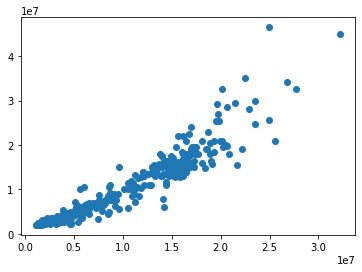

In [28]:
plt.scatter(Y_pred,Y_test)

### Using Random Forest Model 

In [61]:
#resetting values of y_pred and x_pred
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=0)

In [62]:
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.ensemble import RandomForestRegressor
regressor2 = RandomForestRegressor(n_estimators = 500, random_state = 0)
regressor2.fit(X_train, Y_train)

C:\Users\Garima Ranjan\AppData\Local\Temp\ipykernel_20444\1903883464.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor2.fit(X_train, Y_train)


RandomForestRegressor(n_estimators=500, random_state=0)

In [63]:
Y_pred= regressor2.predict(X_test)
print(mean_absolute_percentage_error(Y_test, Y_pred))

0.11664613066282309


In [64]:
np.set_printoptions(precision=2)
print(np.concatenate((Y_pred.reshape(len(Y_pred),1), Y_test.reshape(len(Y_test),1)),1))

[[20550200.   18000000.  ]
 [ 4939520.    4700000.  ]
 [13285000.   14500000.  ]
 [15798199.99 18000000.  ]
 [ 3883338.43  3800000.  ]
 [ 3704745.89  4000000.  ]
 [16919800.   14900000.  ]
 [11854916.67 11000000.  ]
 [ 2442558.57  2000000.  ]
 [ 3609120.    3600000.  ]
 [ 6480492.32  5500000.  ]
 [ 2500000.    2500000.  ]
 [ 3471947.86  3211000.  ]
 [ 2619930.19  2599000.  ]
 [13262599.84 13100000.  ]
 [ 3728411.48  4500000.  ]
 [ 3429693.17  3600000.  ]
 [ 2838180.1   2900000.  ]
 [13353649.88 13200000.  ]
 [ 3933908.32  6500000.  ]
 [ 5884683.33  6000000.  ]
 [13217931.93 13500000.  ]
 [ 3611244.44  3500000.  ]
 [30038450.   35000000.  ]
 [15213223.33 14500000.  ]
 [ 4582032.09  3300000.  ]
 [11711879.97 15000000.  ]
 [ 5132520.    4500000.  ]
 [20560000.   25400000.  ]
 [22968700.   16000000.  ]
 [ 4496139.25  4099000.  ]
 [ 4215648.81  3851000.  ]
 [10709000.   10000000.  ]
 [ 3285988.09  2800000.  ]
 [ 4368503.41  4500000.  ]
 [15384785.71 15600000.  ]
 [ 5324776.8   6500000.  ]
 

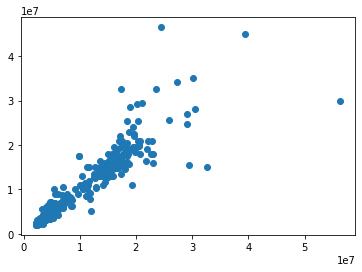

In [46]:
plt.scatter(Y_pred,Y_test)

## Random forest model is best with error of just 0.115

## Challenges faced


In [48]:
#Finding dataset
#Number of data in dataset
#Finding the right model
#increasing accuracy of Random Forest